### Praktikum Pengolahan Citra
### Praktikum 07 Fitur Bentuk
#### Nama : Wahyu Primayasa
#### Kelas : 2 D4 Teknik Informatika B
#### NRP : 2110191046

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [3]:
def resizeGambar(img, width, height):
    dim = (width, height)
    resize = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    #print("Size : ", resize.shape)
    return resize

### Menampilkan Angka

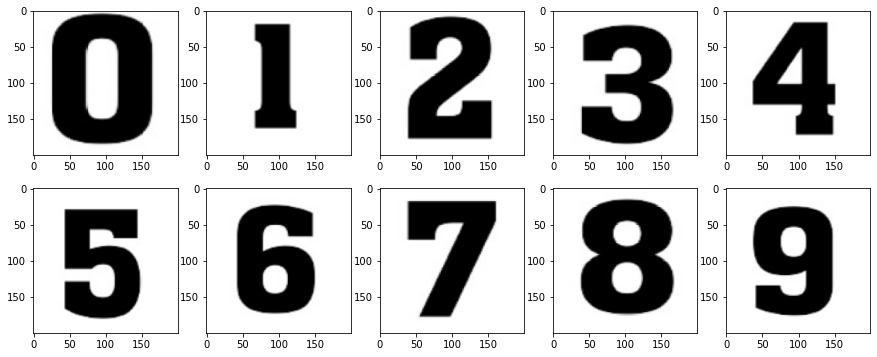

In [4]:
width = 200
height = 200
image_name = ['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png',]
plt.subplots(figsize=(15,6))
for i in range(10):
    img = mpimg.imread(image_name[i])
    img = resizeGambar(img, width, height)
    plt.subplot(2, 5, i+1), plt.imshow(img)
plt.show()

### Menampilkan Huruf

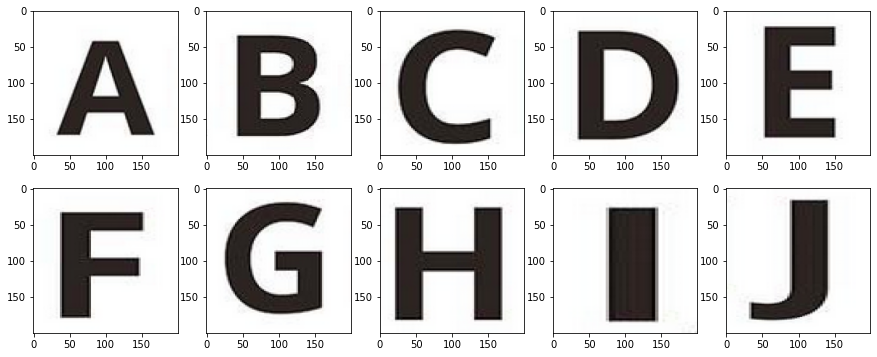

In [5]:
width = 200
height = 200
alfabet_name = ['A.png', 'B.png', 'C.png', 'D.png', 'E.png', 'F.png', 'G.png', 'H.png', 'I.png', 'J.png']
plt.subplots(figsize=(15,6))
for i in range(10):
    img = mpimg.imread(alfabet_name[i])
    img = resizeGambar(img, width, height)
    plt.subplot(2, 5, i+1), plt.imshow(img)
plt.show()

### Menampilkan Fitur

(200, 200, 3)
y1,x1 10 10
row1, col1 =  200 200 40000


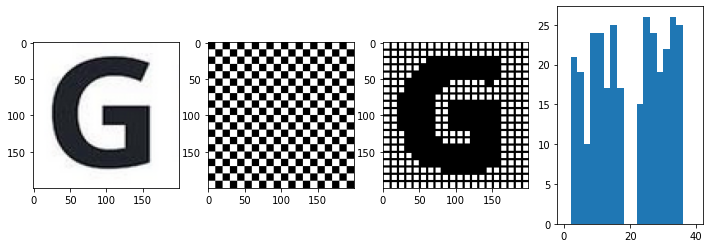

In [6]:
image = cv2.imread("g.png")

image = resizeGambar(image, 200, 200)
print(image.shape)

row01,col01,n = image.shape
k = 2
n = k * 10
s = np.int0(22/k)
th = 15

y = np.int0(row01/n)
x = np.int0(col01/n)
print("y1,x1",y,x)
row01 = n * y
col01 = n * x
print("row1, col1 = ",row01, col01, row01*col01 )
temp = np.zeros((row01, col01, 3), np.uint8)
temp[:,:] = (255,255,255)
result = np.zeros((row01, col01, 3), np.uint8)
result[:,:] = (255,255,255)

# Garis mendatar
for i in range(1, n):
    cv2.line(result, (0,y*i),(220,y*i), (0,0,0), 2)

# Garis vertical
for i in range(1,n):
    cv2.line(result, (x*i, 0), (x*i, 220), (0, 0, 0), 2)

for y1 in range(0, n):
    if y1 % 2 == 0:
        for x1 in range(0, n):
            if x1 % 2 == 0:
                temp[y * y1 : y * y1 + y , x * x1 : x * x1 + x] = (0, 0, 0)
    else:
        for x1 in range(0, n - 1):
            if x1 % 2 == 0:
                temp[y * y1 : y * y1 + y , x + x * x1 : 2 * x + x * x1] = (0, 0, 0)

# Gambar dijadikan grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

g1 = []
kotak = np.zeros((n * n))

for y1 in range(0, row01):
    for x1 in range(0, col01):
        if gray[y1, x1] < 200:
            index = np.int0(y1 / y) * n + np.int0(x1 / x)
            kotak[index] += 1
                      
for i in range(0, n*n):
    kolom = int((i-1) / n)
    baris = (i-1) % n
    if kotak[i] > th :
        result[y * kolom : y * kolom + y , x + x * baris : 2 * x + x * baris] = (0, 0, 0)

# Memerikasi isi kotak, apakah hitam atau tidak
q = []
histogram = []
bins1 = []
# Nilai Bins Horizontal
for j in range(0, n):
    for i in range(0, n):        
        if kotak[j * n + i] > th:            
            q.append(1)
            histogram.append(j)
    bins1.append(sum(q))
    q.clear()

# Nilai Bins Vertical
for i in range(0, n):
    for j in range(0, n):
        if kotak[j * n + i] > th:
            q.append(1)
            histogram.append(i + n)
    bins1.append(sum(q))
    q.clear()

# n1, bins, patches = plt.hist(histogram, 40)
# print("- bins1 -")
# print(bins1)

plt.subplots(figsize=(12,4))
plt.subplot(141), plt.imshow(image)
plt.subplot(142), plt.imshow(temp)
plt.subplot(143), plt.imshow(result)
plt.subplot(144), plt.hist(histogram, 20, [0, 40])
plt.show()

### Menampilkan Beberapa Fitur Objek

In [7]:
def fitur_objek(img_file) :
    image = cv2.imread(img_file)

    image = resizeGambar(image, 200, 200)

    row01,col01,n = image.shape
    k = 2
    n = k * 10
    s = np.int0(22/k)
    th = 15

    y = np.int0(row01/n)
    x = np.int0(col01/n)
    
    row01 = n * y
    col01 = n * x
    
    temp = np.zeros((row01, col01, 3), np.uint8)
    temp[:,:] = (255,255,255)
    result = np.zeros((row01, col01, 3), np.uint8)
    result[:,:] = (255,255,255)

    # Garis mendatar
    for i in range(1, n):
        cv2.line(result, (0,y*i),(220,y*i), (0,0,0), 2)

    # Garis vertical
    for i in range(1,n):
        cv2.line(result, (x*i, 0), (x*i, 220), (0, 0, 0), 2)

    for y1 in range(0, n):
        if y1 % 2 == 0:
            for x1 in range(0, n):
                if x1 % 2 == 0:
                    temp[y * y1 : y * y1 + y , x * x1 : x * x1 + x] = (0, 0, 0)
        else:
            for x1 in range(0, n - 1):
                if x1 % 2 == 0:
                    temp[y * y1 : y * y1 + y , x + x * x1 : 2 * x + x * x1] = (0, 0, 0)

    # Gambar dijadikan grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    g1 = []
    kotak = np.zeros((n * n))

    for y1 in range(0, row01):
        for x1 in range(0, col01):
            if gray[y1, x1] < 200:
                index = np.int0(y1 / y) * n + np.int0(x1 / x)
                kotak[index] += 1

    for i in range(0, n*n):
        kolom = int((i-1) / n)
        baris = (i-1) % n
        if kotak[i] > th :
            result[y * kolom : y * kolom + y , x + x * baris : 2 * x + x * baris] = (0, 0, 0)

    # Memerikasi isi kotak, apakah hitam atau tidak
    q = []
    histogram = []
    bins1 = []
    # Nilai Bins Horizontal
    for j in range(0, n):
        for i in range(0, n):        
            if kotak[j * n + i] > th:            
                q.append(1)
                histogram.append(j)
        bins1.append(sum(q))
        q.clear()

    # Nilai Bins Vertical
    for i in range(0, n):
        for j in range(0, n):
            if kotak[j * n + i] > th:
                q.append(1)
                histogram.append(i + n)
        bins1.append(sum(q))
        q.clear()

    return image, result, histogram;

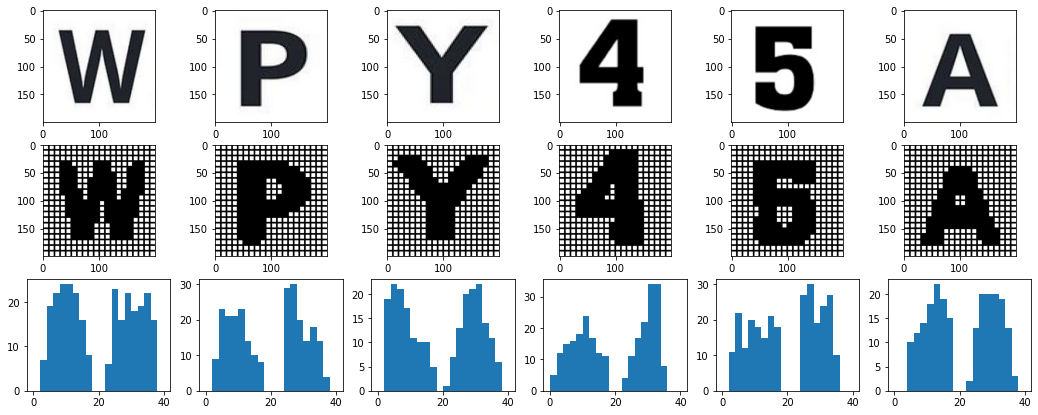

In [8]:
img_file = ['W.png', 'P.png', 'Y.png', '4.png', '5.png', 'A.png']
image = []
result = []
histogram = []
for i in range(6):
    imageTemp, resultTemp, histogramTemp = fitur_objek(img_file[i])
    image.append(imageTemp)
    result.append(resultTemp)
    histogram.append(histogramTemp)
    
plt.subplots(figsize=(18, 7))
for i in range(6):    
    plt.subplot(3, 6, i+1), plt.imshow(image[i])
    plt.subplot(3, 6, i+7), plt.imshow(result[i])
    plt.subplot(3, 6, i+13), plt.hist(histogram[i], 20, [0, 40])
plt.show()